# Flower Classification

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, shutil
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
import glob
%matplotlib inline

In [2]:
img = plt.imread('./data/flowers/tulip/10791227_7168491604.jpg')

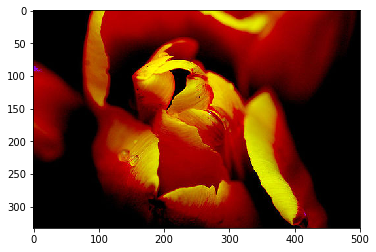

In [3]:
plt.imshow(img)

In [4]:
path = "./data/flowers/"

allTulips = glob.glob(path + 'tulip' + "/*")
allDaisys = glob.glob(path + 'daisy' + "/*")
allDandelions = glob.glob(path + 'dandelion' + "/*")
allRosess = glob.glob(path + 'rose' + "/*")
allSunflowers = glob.glob(path + 'sunflower' + "/*")

In [5]:
print(f'Tulips: {len(allTulips)}')
print(f'Daisys: {len(allDaisys)}')
print(f'Dandelions: {len(allDandelions)}')
print(f'Roses: {len(allRosess)}')
print(f'Sunflowers: {len(allSunflowers)}')

print(f'Total: {len(allTulips) + len(allDaisys) + len(allDandelions) + len(allRosess) + len(allSunflowers)}')

Tulips: 984
Daisys: 769
Dandelions: 1055
Roses: 784
Sunflowers: 734
Total: 4326


In [6]:
flowers_list = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

original_dataset_dir = './data/flowers'
base_dir = './data/flowers_data'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

for flower in flowers_list:
    train_flowers_dir = os.path.join(train_dir, flower)
    os.mkdir(train_flowers_dir)
    
    validation_flowers_dir = os.path.join(validation_dir, flower)
    os.mkdir(validation_flowers_dir)

    test_flowers_dir = os.path.join(test_dir, flower)
    os.mkdir(test_flowers_dir)

In [7]:
test_tulip_split = allTulips[0:round(len(allTulips) * 0.10)]
val_tulip_split = allTulips[round(len(allTulips) * 0.10):round(len(allTulips) * 0.30)]
train_tulip_split = allTulips[round(len(allTulips) * 0.30):]

test_daisy_split = allDaisys[0:round(len(allDaisys) * 0.10)]
val_daisy_split = allDaisys[round(len(allDaisys) * 0.10):round(len(allDaisys) * 0.30)]
train_daisy_split = allDaisys[round(len(allDaisys) * 0.30):]

test_dandelion_split = allDandelions[0:round(len(allDandelions) * 0.10)]
val_dandelion_split = allDandelions[round(len(allDandelions) * 0.10):round(len(allDandelions) * 0.30)]
train_dandelion_split = allDandelions[round(len(allDandelions) * 0.30):]

test_rose_split = allRosess[0:round(len(allRosess) * 0.10)]
val_rose_split = allRosess[round(len(allRosess) * 0.10):round(len(allRosess) * 0.30)]
train_rose_split = allRosess[round(len(allRosess) * 0.30):]

test_sunflower_split = allSunflowers[0:round(len(allSunflowers) * 0.10)]
val_sunflower_split = allSunflowers[round(len(allSunflowers) * 0.10):round(len(allSunflowers) * 0.30)]
train_sunflower_split = allSunflowers[round(len(allSunflowers) * 0.30):]

### Inspecting a split

In [8]:
print(len(test_sunflower_split))
print(len(val_sunflower_split))
print(len(train_sunflower_split))

73
147
514


In [9]:
print(f'Tulip Splits: {len(test_tulip_split + val_tulip_split + train_tulip_split)}')
print(f'Daisys Splits: {len(test_daisy_split + val_daisy_split + train_daisy_split)}')
print(f'Dandelions Splits: {len(test_dandelion_split + val_dandelion_split + train_dandelion_split)}')
print(f'Roses Splits: {len(test_rose_split + val_rose_split + train_rose_split)}')
print(f'Sunflowers Splits: {len(test_sunflower_split + val_sunflower_split + train_sunflower_split)}')

Tulip Splits: 984
Daisys Splits: 769
Dandelions Splits: 1055
Roses Splits: 784
Sunflowers Splits: 734


In [10]:
train_n = train_tulip_split + train_daisy_split + train_dandelion_split + train_rose_split + train_sunflower_split
val_n = val_tulip_split + val_daisy_split + val_dandelion_split + val_rose_split + val_sunflower_split

In [11]:
len(val_n)

865

We can see that the totals add up to the origional data.

### Copy tulips

In [12]:
for fname in test_tulip_split:
    dst = os.path.join(test_dir + '/tulip', fname.split('/')[-1])
    shutil.copyfile(fname, dst)

for fname in val_tulip_split:
    dst = os.path.join(validation_dir + '/tulip', fname.split('/')[-1])
    shutil.copyfile(fname, dst)
    
for fname in train_tulip_split:
    dst = os.path.join(train_dir + '/tulip', fname.split('/')[-1])
    shutil.copyfile(fname, dst)

### Copy Daisys

In [13]:
for fname in test_daisy_split:
    dst = os.path.join(test_dir + '/daisy', fname.split('/')[-1])
    shutil.copyfile(fname, dst)

for fname in val_daisy_split:
    dst = os.path.join(validation_dir + '/daisy', fname.split('/')[-1])
    shutil.copyfile(fname, dst)
    
for fname in train_daisy_split:
    dst = os.path.join(train_dir + '/daisy', fname.split('/')[-1])
    shutil.copyfile(fname, dst)

### Copy Dandelion

In [14]:
for fname in test_dandelion_split:
    dst = os.path.join(test_dir + '/dandelion', fname.split('/')[-1])
    shutil.copyfile(fname, dst)

for fname in val_dandelion_split:
    dst = os.path.join(validation_dir + '/dandelion', fname.split('/')[-1])
    shutil.copyfile(fname, dst)
    
for fname in train_dandelion_split:
    dst = os.path.join(train_dir + '/dandelion', fname.split('/')[-1])
    shutil.copyfile(fname, dst)

### Copy Rose

In [15]:
for fname in test_rose_split:
    dst = os.path.join(test_dir + '/rose', fname.split('/')[-1])
    shutil.copyfile(fname, dst)

for fname in val_rose_split:
    dst = os.path.join(validation_dir + '/rose', fname.split('/')[-1])
    shutil.copyfile(fname, dst)
    
for fname in train_rose_split:
    dst = os.path.join(train_dir + '/rose', fname.split('/')[-1])
    shutil.copyfile(fname, dst)

### Copy Sunflower

In [16]:
for fname in test_sunflower_split:
    dst = os.path.join(test_dir + '/sunflower', fname.split('/')[-1])
    shutil.copyfile(fname, dst)

for fname in val_sunflower_split:
    dst = os.path.join(validation_dir + '/sunflower', fname.split('/')[-1])
    shutil.copyfile(fname, dst)
    
for fname in train_sunflower_split:
    dst = os.path.join(train_dir + '/sunflower', fname.split('/')[-1])
    shutil.copyfile(fname, dst)

## Preprocessing

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20)

Found 3027 images belonging to 5 classes.


In [19]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20)

Found 864 images belonging to 5 classes.


## Model 1

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [27]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=150,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/10
150/150 [==============================] - 10s 67ms/step - loss: 0.8983 - acc: 0.6511 - val_loss: 1.0096 - val_acc: 0.6237
Epoch 2/10
150/150 [==============================] - 10s 67ms/step - loss: 0.7999 - acc: 0.6974 - val_loss: 1.0295 - val_acc: 0.6013
Epoch 3/10
150/150 [==============================] - 10s 67ms/step - loss: 0.7028 - acc: 0.7399 - val_loss: 1.4157 - val_acc: 0.4513
Epoch 4/10
150/150 [==============================] - 10s 67ms/step - loss: 0.6191 - acc: 0.7759 - val_loss: 1.1179 - val_acc: 0.5825
Epoch 5/10
150/150 [==============================] - 10s 67ms/step - loss: 0.5424 - acc: 0.8187 - val_loss: 1.0902 - val_acc: 0.5962
Epoch 6/10
150/150 [==============================] - 10s 67ms/step - loss: 0.4547 - acc: 0.8498 - val_loss: 1.0661 - val_acc: 0.6138
Epoch 7/10
150/150 [==============================] - 10s 67ms/step - loss: 0.3812 - acc: 0.8807 - val_loss: 1.1477 - val_acc: 0.6025
Epoch 8/10
150/150 [==============================] - 10s 66ms

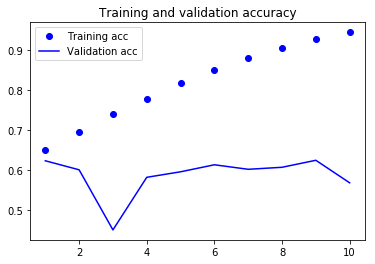

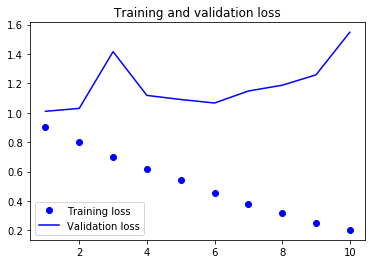

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

This model is overfitting quite severely.

## Model 2

In [33]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dense(5, activation='softmax'))

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [35]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history_2 = model_2.fit_generator(
      train_generator,
      steps_per_epoch=150,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/10
150/150 [==============================] - 10s 67ms/step - loss: 1.1700 - acc: 0.4985 - val_loss: 1.1407 - val_acc: 0.5125
Epoch 2/10
150/150 [==============================] - 10s 67ms/step - loss: 1.0467 - acc: 0.5831 - val_loss: 1.1025 - val_acc: 0.5338
Epoch 3/10
150/150 [==============================] - 10s 66ms/step - loss: 0.9857 - acc: 0.6062 - val_loss: 0.9852 - val_acc: 0.6363
Epoch 4/10
150/150 [==============================] - 10s 67ms/step - loss: 0.9164 - acc: 0.6401 - val_loss: 0.9794 - val_acc: 0.6087
Epoch 5/10
150/150 [==============================] - 10s 67ms/step - loss: 0.8628 - acc: 0.6595 - val_loss: 0.9404 - val_acc: 0.6237
Epoch 6/10
150/150 [==============================] - 10s 66ms/step - loss: 0.8126 - acc: 0.6870 - val_loss: 0.9899 - val_acc: 0.6037
Epoch 7/10
150/150 [==============================] - 10s 66ms/step - loss: 0.7714 - acc: 0.7087 - val_loss: 0.9936 - val_acc: 0.6063
Epoch 8/10
150/150 [==============================] - 10s 66ms

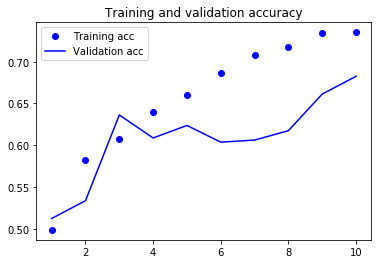

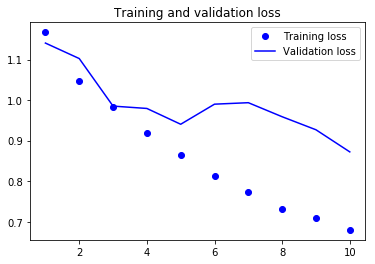

In [36]:
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Adding an additional Conv2D and MaxPooling2D layer seems to have helped.

## Model 3

In [37]:
model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Flatten())
model_3.add(layers.Dense(512, activation='relu'))
model_3.add(layers.Dense(5, activation='softmax'))

model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [38]:
model_3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['acc'])

history_3 = model_3.fit_generator(
      train_generator,
      steps_per_epoch=150,
      epochs=7,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/7
150/150 [==============================] - 10s 67ms/step - loss: 1.3569 - acc: 0.3936 - val_loss: 1.2036 - val_acc: 0.5012
Epoch 2/7
150/150 [==============================] - 10s 66ms/step - loss: 1.1392 - acc: 0.5272 - val_loss: 1.1328 - val_acc: 0.5338
Epoch 3/7
150/150 [==============================] - 10s 66ms/step - loss: 1.0247 - acc: 0.5844 - val_loss: 1.0125 - val_acc: 0.5775
Epoch 4/7
150/150 [==============================] - 10s 66ms/step - loss: 0.9144 - acc: 0.6448 - val_loss: 0.9616 - val_acc: 0.6162
Epoch 5/7
150/150 [==============================] - 10s 66ms/step - loss: 0.8331 - acc: 0.6795 - val_loss: 1.0322 - val_acc: 0.6075
Epoch 6/7
150/150 [==============================] - 10s 65ms/step - loss: 0.8161 - acc: 0.6940 - val_loss: 0.9222 - val_acc: 0.6762
Epoch 7/7
150/150 [==============================] - 10s 66ms/step - loss: 0.7233 - acc: 0.7231 - val_loss: 0.8059 - val_acc: 0.6888


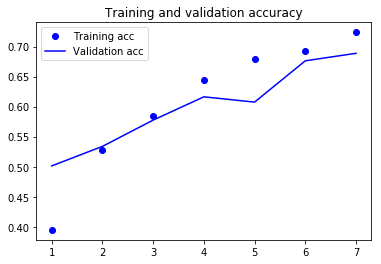

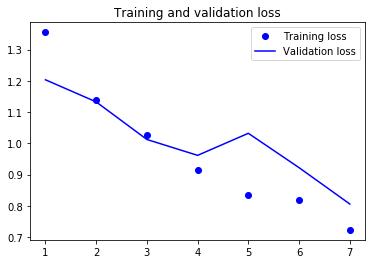

In [39]:
acc = history_3.history['acc']
val_acc = history_3.history['val_acc']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Adding an additional Conv2D and MaxPooling2D layer seems to have helped again.

## Data Augmentation

In [40]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [51]:
img_path = train_sunflower_split[1]

In [52]:
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

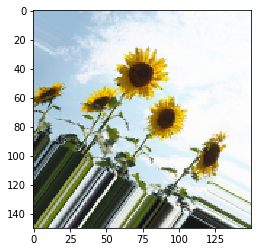

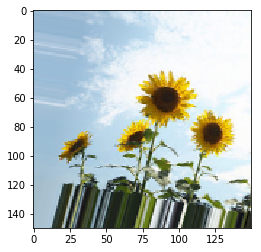

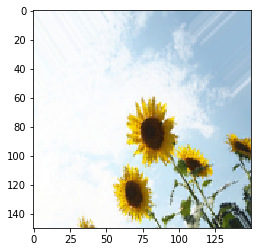

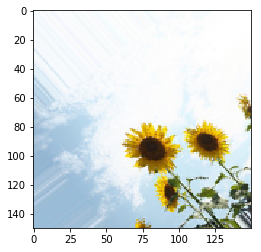

In [53]:
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Model 4

In [58]:
model_4 = models.Sequential()
model_4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Dropout(0.5))
model_4.add(layers.Flatten())
model_4.add(layers.Dense(512, activation='relu'))
model_4.add(layers.Dense(5, activation='softmax'))

model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [59]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

In [60]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20)

model_4.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['acc'])

history_4 = model_4.fit_generator(
      train_generator,
      steps_per_epoch=150,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=40)

Found 3027 images belonging to 5 classes.
Found 864 images belonging to 5 classes.
Epoch 1/20
150/150 [==============================] - 25s 165ms/step - loss: 1.4957 - acc: 0.3149 - val_loss: 1.3440 - val_acc: 0.4075
Epoch 2/20
150/150 [==============================] - 24s 163ms/step - loss: 1.2635 - acc: 0.4399 - val_loss: 1.1493 - val_acc: 0.5225
Epoch 3/20
150/150 [==============================] - 24s 160ms/step - loss: 1.1737 - acc: 0.4862 - val_loss: 1.2584 - val_acc: 0.4625
Epoch 4/20
150/150 [==============================] - 24s 159ms/step - loss: 1.1253 - acc: 0.5191 - val_loss: 1.0542 - val_acc: 0.5800
Epoch 5/20
150/150 [==============================] - 24s 158ms/step - loss: 1.0769 - acc: 0.5689 - val_loss: 0.9844 - val_acc: 0.6325
Epoch 6/20
150/150 [==============================] - 23s 155ms/step - loss: 0.9962 - acc: 0.6261 - val_loss: 0.9454 - val_acc: 0.6450
Epoch 7/20
150/150 [==============================] - 23s 154ms/step - loss: 0.9250 - acc: 0.6368 - val_los

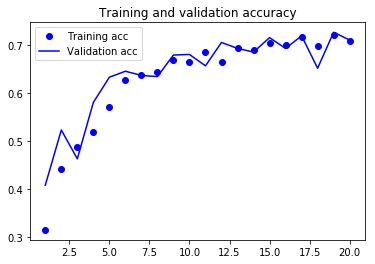

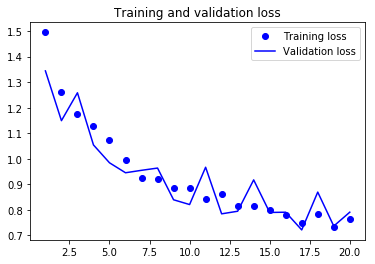

In [61]:
acc = history_4.history['acc']
val_acc = history_4.history['val_acc']
loss = history_4.history['loss']
val_loss = history_4.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Data augmentation and a dropout layer seems to have really improved the overfitting issue.